In [1]:
import tensorflow as tf
import keras
import numpy as np 
import pandas as pd

In [2]:
#加载路径
import glob
datasets_dir =  glob.glob('./multi-output-classification/dataset/*/*')

In [3]:
import random
random.shuffle(datasets_dir)

In [ ]:
datasets_dir.shape

In [5]:
from keras.preprocessing.image import load_img,img_to_array

In [6]:
datasets_image_array = [(img_to_array(load_img(i,target_size=(224,224))))/255 for i in datasets_dir]

C:\Users\pc\anaconda3\envs\Anaconda3\lib\site-packages\PIL\Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [7]:
datasets_image_array

[array([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        ...,
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]], dtype=float32),
 array([[[0.03921569, 0.04313726, 0.0235

In [8]:
#测试集和训练集
split= int(len(datasets_image_array)*0.8)
train = datasets_image_array[:split]
test = datasets_image_array[split:]

In [9]:
train=np.array(train)
test =np.array(test)

In [10]:
train.shape,test.shape

((2020, 224, 224, 3), (505, 224, 224, 3))

In [11]:
#label输出数据处理
datasets=[datasets_dir[i].split('\\')[1].split('_') for i in range(len(datasets_dir))]

In [12]:
datasets = pd.DataFrame(datasets)

In [13]:
datasets

,0,1
0,blue,dress
1,red,dress
2,black,shoes
3,black,jeans
4,blue,dress
...,...,...
2520,blue,dress
2521,blue,dress
2522,blue,jeans
2523,blue,shirt


In [14]:
#pd.fatterize()
colors = pd.factorize(datasets[0])
items =pd.factorize(datasets[1])

In [15]:
colors[1]

Index(['blue', 'red', 'black'], dtype='object')

In [16]:
# 训练集和测试集
train_colors = np.array(colors[0][:split])
test_colors = np.array(colors[0][split:])
train_items = np.array(items[0][:split])
test_items = np.array(items[0][split:])

In [17]:
#x
train.shape,test.shape

((2020, 224, 224, 3), (505, 224, 224, 3))

In [18]:
#y
train_colors.shape,test_colors.shape,train_items.shape,test_items.shape

((2020,), (505,), (2020,), (505,))

In [19]:
#构建网络模型
#MobileNet
conv_base = tf.keras.applications.MobileNet(input_shape=(224, 224, 3), weights='imagenet',include_top=False)

In [20]:
inputs = tf.keras.Input(shape=(224,224,3))

In [21]:
x=conv_base(inputs)

In [22]:
x=tf.keras.layers.GlobalAveragePooling2D()(x)

In [23]:
x_color = tf.keras.layers.Dense(1024,activation='relu')(x)
output_color = tf.keras.layers.Dense(3,activation='softmax',name='color')(x_color)

In [24]:
x_item = tf.keras.layers.Dense(1024,activation='relu')(x)
output_item = tf.keras.layers.Dense(4,activation='softmax',name='item')(x_item)

In [25]:
model = tf.keras.Model(inputs=inputs,outputs=[output_color,output_item],name='multi_model')

In [26]:
model.summary()

Model: "multi_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 mobilenet_1.00_224 (Functional  (None, 7, 7, 1024)  3228864     ['input_2[0][0]']                
 )                                                                                                
                                                                                                  
 global_average_pooling2d (Glob  (None, 1024)        0           ['mobilenet_1.00_224[0][0]']     
 alAveragePooling2D)                                                                    

In [27]:
model.compile(optimizer='adam',
              loss={'color':'sparse_categorical_crossentropy','item':'sparse_categorical_crossentropy'},
             metrics=['acc'])

In [28]:
model.fit(train,[train_colors,train_items],epochs=10,batch_size=16,validation_data=(test,[test_colors,test_items]))

Epoch 1/10
127/127 [==============================] - 305s 2s/step - loss: 0.7081 - color_loss: 0.2862 - item_loss: 0.4219 - color_acc: 0.9183 - item_acc: 0.9109 - val_loss: 0.5434 - val_color_loss: 0.1892 - val_item_loss: 0.3541 - val_color_acc: 0.9465 - val_item_acc: 0.9149
Epoch 2/10
127/127 [==============================] - 269s 2s/step - loss: 0.1751 - color_loss: 0.0871 - item_loss: 0.0879 - color_acc: 0.9748 - item_acc: 0.9723 - val_loss: 0.2074 - val_color_loss: 0.0611 - val_item_loss: 0.1463 - val_color_acc: 0.9881 - val_item_acc: 0.9663
Epoch 3/10
127/127 [==============================] - 258s 2s/step - loss: 0.0834 - color_loss: 0.0412 - item_loss: 0.0422 - color_acc: 0.9866 - item_acc: 0.9871 - val_loss: 0.0897 - val_color_loss: 0.0509 - val_item_loss: 0.0389 - val_color_acc: 0.9861 - val_item_acc: 0.9861
Epoch 4/10
127/127 [==============================] - 334s 3s/step - loss: 0.1291 - color_loss: 0.0559 - item_loss: 0.0732 - color_acc: 0.9861 - item_acc: 0.9777 - val_l

#### 评估模型

In [29]:
#评估
model.evaluate(test,[test_colors,test_items])

16/16 [==============================] - 15s 930ms/step - loss: 0.0313 - color_loss: 0.0107 - item_loss: 0.0206 - color_acc: 0.9941 - item_acc: 0.9980


[0.03130677714943886,
 0.01073282491415739,
 0.020573947578668594,
 0.9940593838691711,
 0.998019814491272]

In [30]:
#预测
predict = model.predict(test)

In [31]:
#color
color=colors[1]
predic_color=color[np.argmax(predict[0][51])]

In [41]:
#item
item = items[1]
predic_item=item[np.argmax(predict[1][1])]

In [42]:
predict_cloth = predic_color+predic_item
predict_cloth

'reddress'

In [43]:
import matplotlib.pyplot as plt

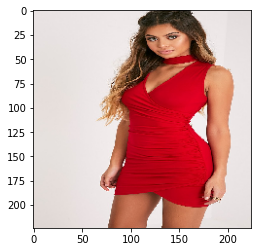

In [44]:
plt.imshow(test[1])

#### 真实图片预测

In [45]:
dir = 'D:/AI/04keras模型/多输出模型/multi-output-classification/examples/red-dress.jpg'

In [46]:
image_array=(img_to_array(load_img(dir,target_size=(224,224)))/255)
image_array=np.expand_dims(image_array,axis=0)
predict_test=model.predict(image_array)

(1, 224, 224, 3)

In [47]:
predic_color=color[np.argmax(predict_test[0])]
predic_item=item[np.argmax(predict_test[1])]
predict_cloth = predic_color+" "+predic_item
predict_cloth

'red dress'

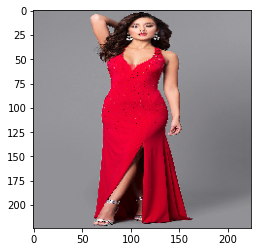

In [48]:
plt.imshow(image_array[0])